# Kinetics estimation for PAR-6
**Idea:** 
1. simulate images of different particle species (different Ds, different spread of Ds), analyse diffusive behavior (D vs a)
2. experimentally determine D vs a for different exposure and lag times
3. combine different species from 1., compare to data from 2., see which combinations fit best

In [1]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as stats
from scipy.optimize import curve_fit
import sys
# Plotting becomes part of the notebook
# Add path to python modules
sys.path.append(os.getcwd()[0:-7]+'src/')
from MovieTracks import DiffusionFitter
from SimDiffusion import ImageSimulator

## 1. Simulate images, analyse

In [2]:
python_simulated = np.ones((10, 1))
diff_coeffs = np.logspace(-2, -0.7, num=10)
num_part = np.array([2700])
for i, D in enumerate(diff_coeffs):
    fol = '/Users/hubatsl/Desktop/SPT/Us/SPT/sample_data/SyntheticData/16_11_22_Simus/test'+str(i)+'/'
    im = ImageSimulator(D, num_part, fname='test'+str(i), folder=fol, timemax=6)
    im.create_images()
    im.write_images()
    im.write_log()
    fitter_instance = DiffusionFitter(fol, 700, parallel=True, pixelSize=0.124,
                                      timestep=0.033, saveFigs=False, showFigs=False,
                                      autoMetaDataExtract=False)
    fitter_instance.analyze()

Frame 180: 2404 trajectories present


In [8]:
diff_coeffs = np.logspace(-2, -0.7, num=10)
df = []
for i, D in enumerate(diff_coeffs):
    file = ('/Users/hubatsl/Desktop/SPT/Us/SPT/sample_data/SyntheticData/16_11_22_Simus/test'+str(i)+
            '/Particle_D_a.csv')
    df.append(pd.read_csv(file))

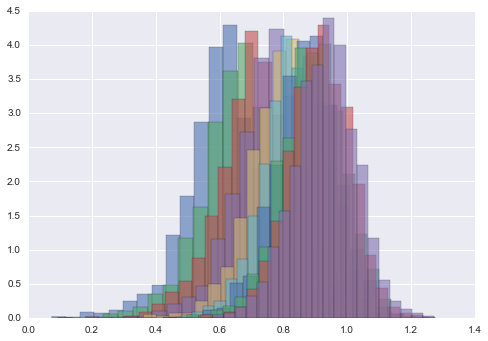

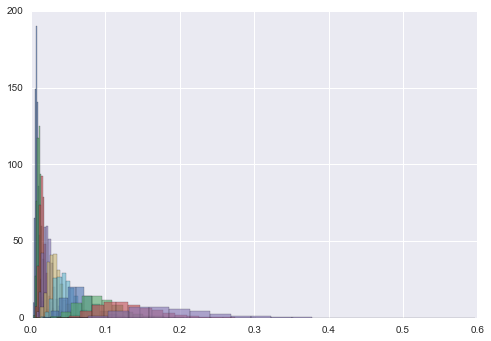

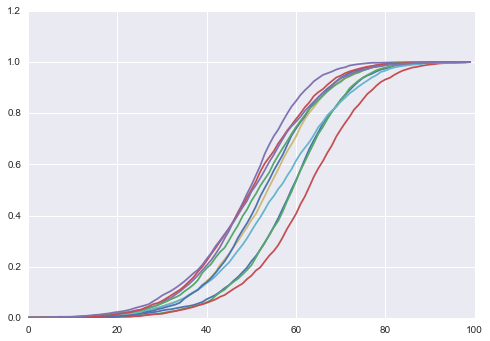

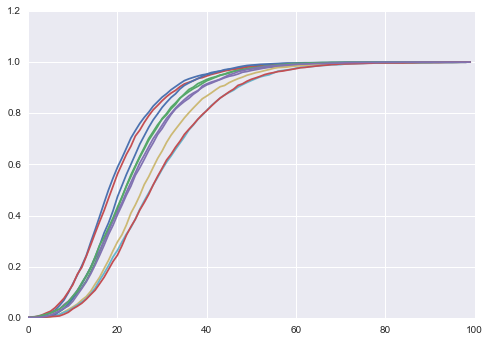

In [9]:
for dataframe in df:
    plt.hist(dataframe['a'], normed=1, alpha=0.6, bins=20);
plt.figure()
for dataframe in df:
    plt.hist(dataframe['D'], normed=1, alpha=0.6, bins=20);
plt.figure()
for dataframe in df:
    counts, bins = np.histogram(dataframe['a'], bins=100, density=True)
    counts = counts*np.diff(bins).mean()
    plt.plot(counts.cumsum())
plt.figure()
for dataframe in df:
    counts, bins = np.histogram(dataframe['D'], bins=100, density=True)
    counts = counts*np.diff(bins).mean()
    plt.plot(counts.cumsum())

In [5]:
counts, bins = np.histogram(dataframe['a'], bins=100, density=True)

In [6]:
np.diff(bins)

array([ 0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00666658,
        0.00666658,  0.00666658,  0.00666658,  0.00666658,  0.00

[  2.00000000e+02   7.50000000e-03   1.00000000e-02]


/Users/hubatsl/anaconda/envs/python3Conda/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


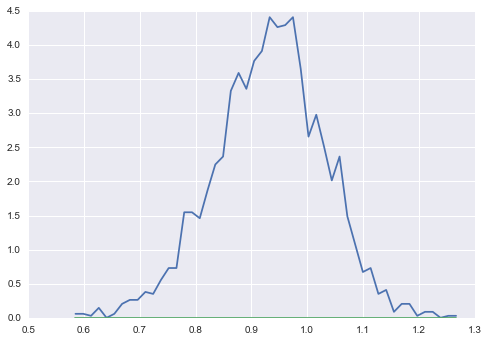

In [31]:
hist, bin_edges = numpy.histogram(df[9]['a'], density=True, bins=50)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [200, 0.0075, 0.01]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data');
plt.plot(bin_centres, hist_fit, label='Fitted data');
print(coeff)